In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\suhaa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\suhaa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
df=pd.read_csv('../er_spills_report.csv')

In [6]:
df.head()

,Incident Number,Incident Status,Incident Date,Reported Date,City,County,Zipcode,Spill Location,Source Description,Material,Amt. Spilled,Units,Receiving Water,Spill Type,Public Intake,Unnamed: 15
0,0,Closed,1/26/2013 0:30,1/26/2013 1:55,Winamac,Pulaski,NaN,112 West Pearl Street,NaN,Motor Oil,NaN,NaN,NaN,Emergency Response-Reportable Spill,NaN,NaN
1,18940,Closed,12/5/2010 13:30,12/6/2010 9:54,Edwardsville,Floyd,64803,"Mile marker 118 on I 64 Edwardsviller, Floyd ...",Trans-Roadway,Diesel,NaN,NaN,NaN,Emergency Response-Emergency,NaN,NaN
2,18944,Closed,12/1/2010 21:06,12/6/2010 12:38,NaN,Not Determined,60410,"25915 Indianapolis Blvd. Channahon, Il 60410",Industrial,Hydrogen Sulfide,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN
3,18945,Closed,12/3/2010 3:45,12/6/2010 12:47,NaN,Not Determined,NaN,"MP: 7.5, Chicago Sub (SB Cicero off ramp from ...",NaN,NaN,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN
4,18946,Closed,12/3/2010 13:28,12/3/2010 12:52,NaN,Not Determined,NaN,"Bryan Railyard Bryan, Ohio",NaN,Ammonium nitrate,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN


In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.shape

(25611, 16)

In [17]:
for x in list(df.columns):
    print(x)

Incident Number
Incident Status
Incident Date
Reported Date
City
County
Zipcode
Spill Location
Source Description
Material
Amt. Spilled
Units
Receiving Water
Spill Type
Public Intake
Unnamed: 15


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25611 entries, 0 to 25610
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Incident Number      25611 non-null  int64  
 1    Incident Status     25611 non-null  object 
 2    Incident Date       24518 non-null  object 
 3    Reported Date       25611 non-null  object 
 4    City                15263 non-null  object 
 5    County              25611 non-null  object 
 6    Zipcode             11547 non-null  object 
 7    Spill Location      25609 non-null  object 
 8    Source Description  12330 non-null  object 
 9    Material            14685 non-null  object 
 10   Amt. Spilled        8437 non-null   float64
 11   Units               8625 non-null   object 
 12   Receiving Water     2023 non-null   object 
 13   Spill Type          25610 non-null  object 
 14   Public Intake       10 non-null     object 
 15  Unnamed: 15      

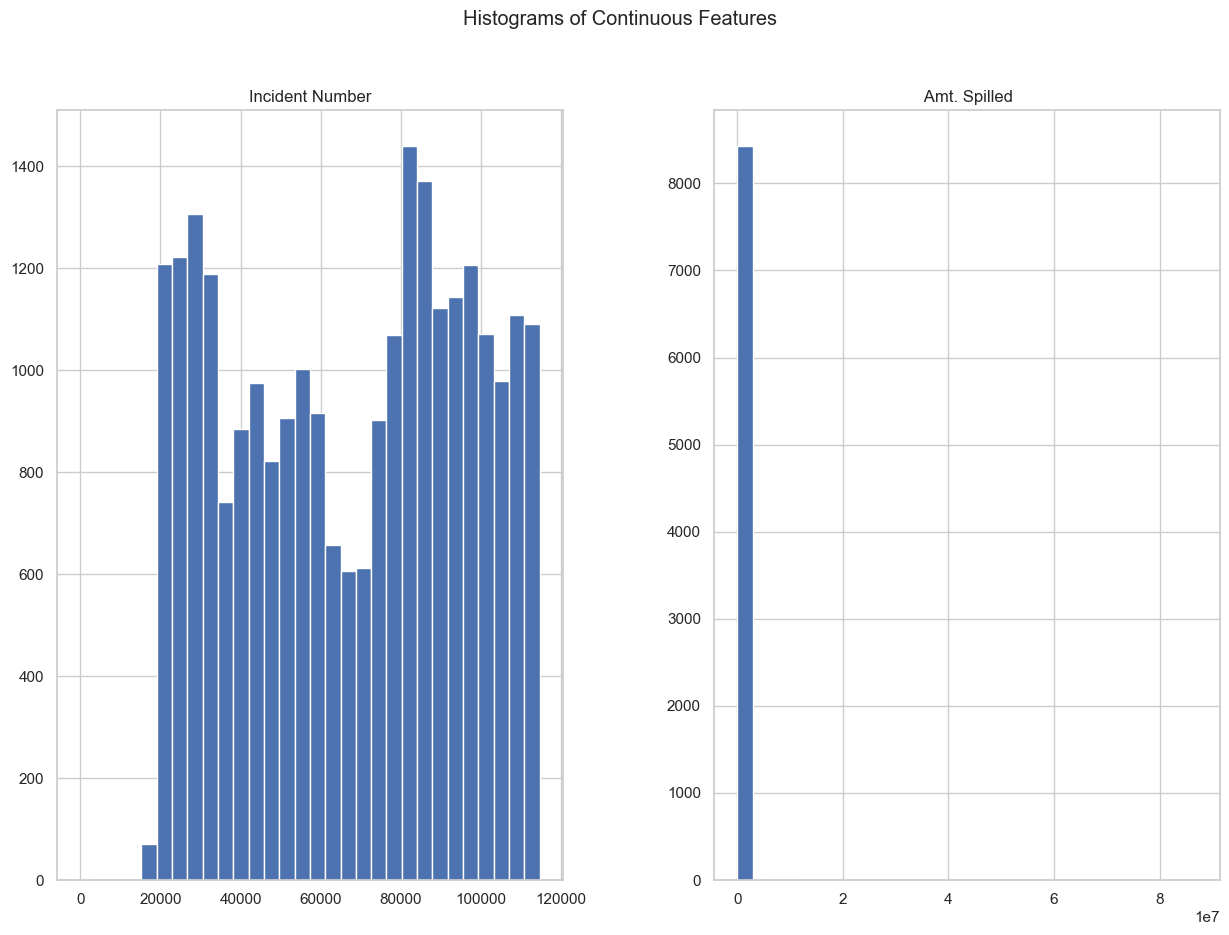

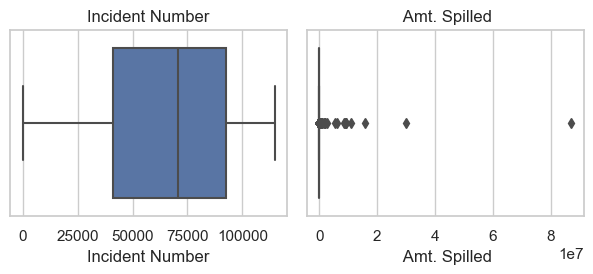

C:\Users\suhaa\AppData\Local\Temp\ipykernel_22708\2071017399.py:40: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  categorical_cols = df.select_dtypes(include=[np.object, 'category']).columns.tolist()


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")


# 1. Basic Information
print("Basic Information:")
print(df.info())
print("\n")
print("Summary Statistics:")
print(df.describe(include='all'))  # Include all columns for categorical features
print("\n")

# 2. Check for missing values
print("Missing Values by Column:")
print(df.isnull().sum())
print("\n")

# 3. Univariate Analysis
# Histograms for continuous numerical variables
continuous_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[continuous_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Continuous Features")
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 4. Categorical Feature Analysis
categorical_cols = df.select_dtypes(include=[np.object, 'category']).columns.tolist()

# Frequency count for categorical variables
for col in categorical_cols:
    print(f"Value Counts for {col}:")
    print(df[col].value_counts())
    print("\n")

# Countplots for categorical variables (top 10 values)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 5, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'{col} - Top 10 Values')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Bivariate Analysis
# Correlation heatmap for numerical features
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features")
plt.show()

# Pairplot to examine relationships between continuous variables
sns.pairplot(df[continuous_cols].dropna())
plt.suptitle("Pairplot of Continuous Features", y=1.02)
plt.show()

# 6. Check for duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")
print("\nSample Duplicates:")
print(duplicates.head())

# 7. Feature Engineering / Transformation
# Check for potential feature transformations (e.g., date extraction, scaling, etc.)
# For example, if YEAR is a feature, we can analyze its distribution:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YEAR')
plt.title("Distribution of YEAR")
plt.xticks(rotation=45)
plt.show()

# 8. Geospatial Analysis (LATITUDE, LONGITUDE)
# If you have geographic coordinates (LATITUDE, LONGITUDE), you can visualize the distribution on a map
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='ST', palette='tab10', alpha=0.7)
plt.title("Geospatial Distribution of Facilities")
plt.show()

# 9. Additional Advanced Visualizations
# - Heatmap for missing data (if any)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# - Analysis of specific chemicals or industries (for example)
# Filter data by specific chemical
chemical = "TRI CHEMICAL/COMPOUND ID"  # You can select other columns of interest
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=chemical, order=df[chemical].value_counts().index[:10])
plt.title(f"Top 10 {chemical}")
plt.xticks(rotation=45)
plt.show()

# 10. Feature Scaling (if needed for specific algorithms)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df[continuous_cols].copy()
df_scaled[continuous_cols] = scaler.fit_transform(df_scaled[continuous_cols])

# Print out some of the scaled data
print(df_scaled.head())

# Save processed data (if needed)
# df_scaled.to_csv('processed_data.csv', index=False)


In [10]:
df

,Incident Number,Incident Status,Incident Date,Reported Date,City,County,Zipcode,Spill Location,Source Description,Material,Amt. Spilled,Units,Receiving Water,Spill Type,Public Intake,Unnamed: 15
0,0,Closed,1/26/2013 0:30,1/26/2013 1:55,Winamac,Pulaski,NaN,112 West Pearl Street,NaN,Motor Oil,NaN,NaN,NaN,Emergency Response-Reportable Spill,NaN,NaN
1,18940,Closed,12/5/2010 13:30,12/6/2010 9:54,Edwardsville,Floyd,64803,"Mile marker 118 on I 64 Edwardsviller, Floyd ...",Trans-Roadway,Diesel,NaN,NaN,NaN,Emergency Response-Emergency,NaN,NaN
2,18944,Closed,12/1/2010 21:06,12/6/2010 12:38,NaN,Not Determined,60410,"25915 Indianapolis Blvd. Channahon, Il 60410",Industrial,Hydrogen Sulfide,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN
3,18945,Closed,12/3/2010 3:45,12/6/2010 12:47,NaN,Not Determined,NaN,"MP: 7.5, Chicago Sub (SB Cicero off ramp from ...",NaN,NaN,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN
4,18946,Closed,12/3/2010 13:28,12/3/2010 12:52,NaN,Not Determined,NaN,"Bryan Railyard Bryan, Ohio",NaN,Ammonium nitrate,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25606,114616,Assigned to Staff,9/27/2024 0:00,9/30/2024 8:05,Greenfield,Hancock,NaN,Circle K 1136 N State St Greenfield Hancock...,Other,Gasoline,50.0,gallons,NaN,Emergency Response-Reportable Spill,NaN,NaN
25607,114622,Closed,3/31/2024 14:42,3/31/2024 13:42,NaN,Marion,NaN,6848 S Tibbs Ave Indianapolis Marion County,NaN,Diesel,200.0,gallons,NaN,Emergency Response-Reportable Spill,NaN,NaN
25608,114624,Assigned to Staff,9/28/2024 0:00,9/28/2024 12:12,NaN,Spencer,NaN,425 Main St Troy Spencer County,NaN,Petroleum,NaN,NaN,NaN,Emergency Response-Other,NaN,NaN
25609,114625,Assigned to Staff,9/30/2024 0:00,9/30/2024 13:14,NaN,Marion,NaN,Cotton Bay North Drive Indianapolis Marion ...,Other,NaN,NaN,NaN,Unnamed Open Waterbody,Emergency Response-Other,NaN,NaN


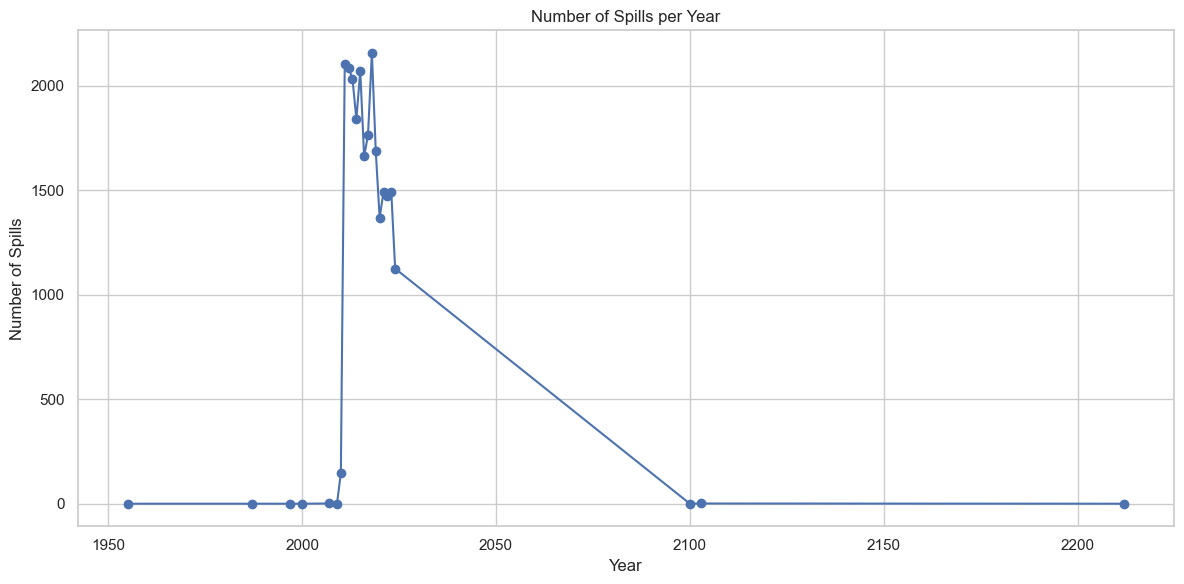

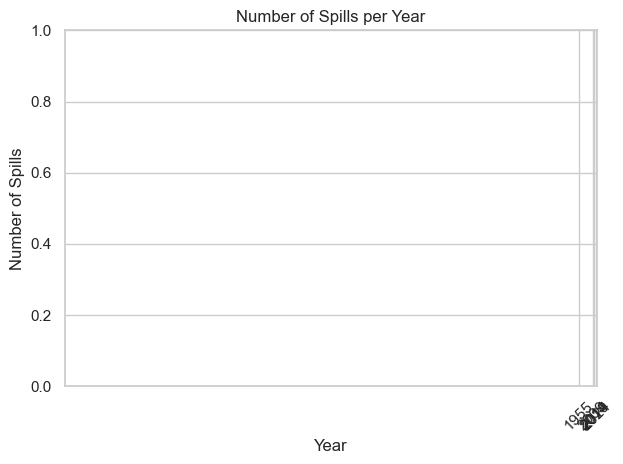

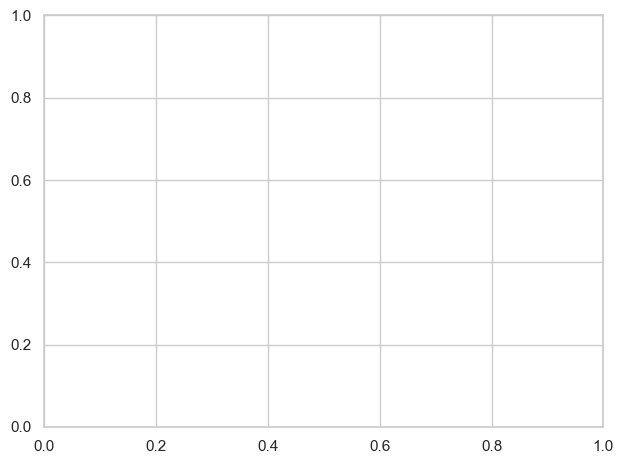

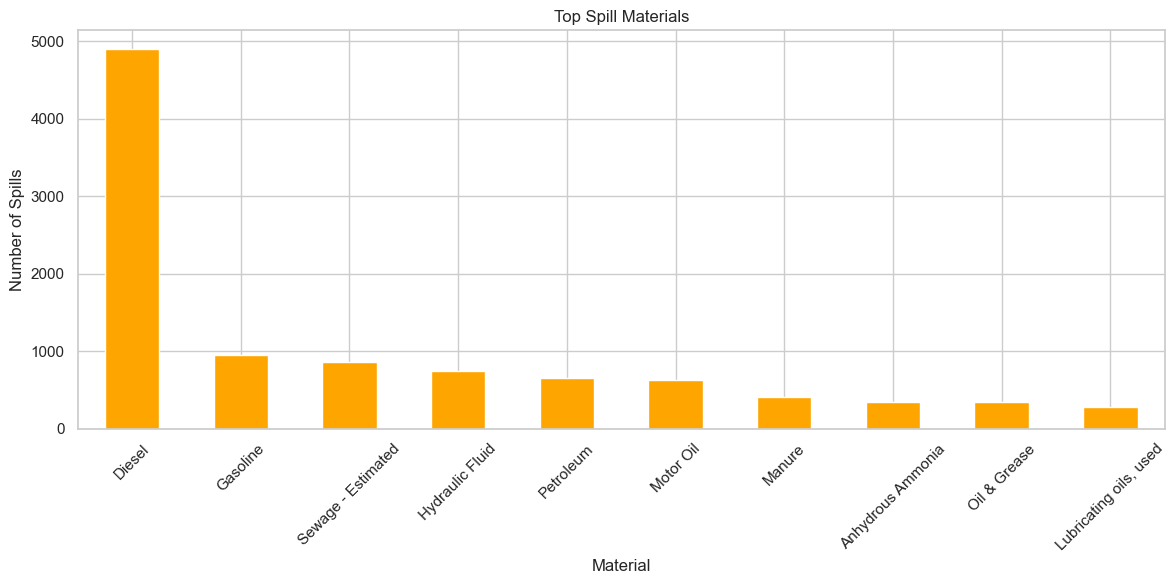

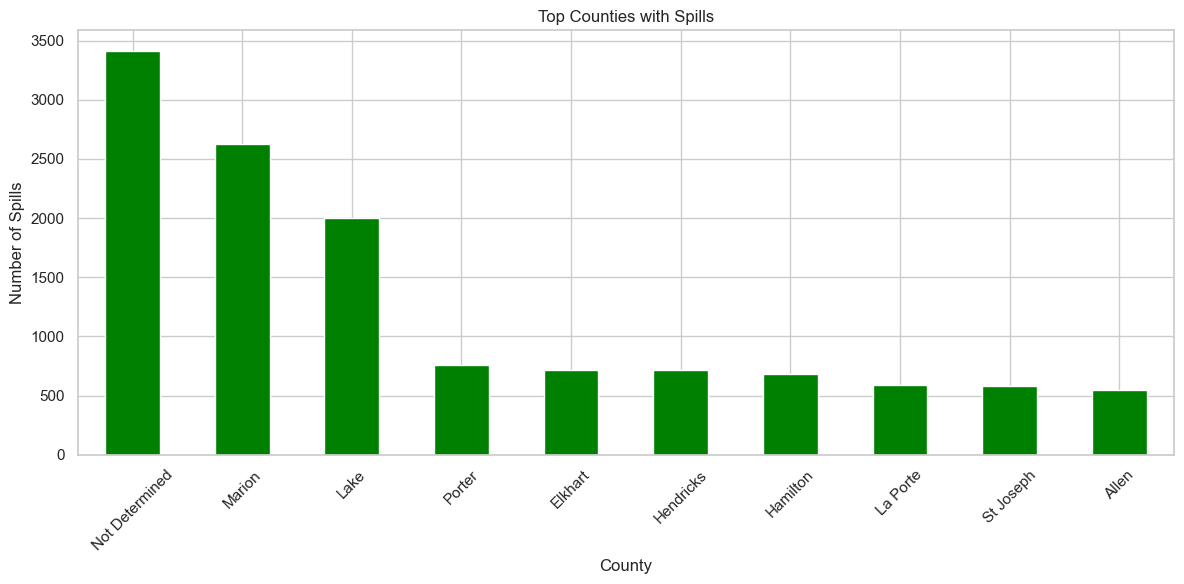

In [22]:
column_names = ["Incident Number", "Incident Status", "Incident Date", "Reported Date", "City", "County", "Zipcode",
                "Spill Location", "Source Description", "Material", "Amt. Spilled", "Units", "Receiving Water",
                "Spill Type", "Public Intake"]

# Convert 'Incident Date' to datetime
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Year'] = df['Incident Date'].dt.year

### 1. Number of Spills per Year ###
spill_counts_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(spill_counts_per_year.index, spill_counts_per_year.values, marker='o')
plt.title('Number of Spills per Year')
plt.xlabel('Year')
plt.ylabel('Number of Spills')
plt.grid(True)
plt.tight_layout()
plt.show()

# Set title and labels
plt.title('Number of Spills per Year')
plt.xlabel('Year')
plt.ylabel('Number of Spills')

# Set x-ticks at regular intervals to avoid overlap (e.g., every 5 years)
plt.xticks(spill_counts_per_year.index[::5], rotation=45)

# Add grid for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Ensure all years are printed on x-axis
# plt.xticks(spill_counts_per_year.index, rotation=45)

# Add grid for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
### 2. Top Spill Materials ###
spill_materials = df['Material'].value_counts().head(10)

plt.figure(figsize=(12,6))
spill_materials.plot(kind='bar', color='orange')
plt.title('Top Spill Materials')
plt.xlabel('Material')
plt.ylabel('Number of Spills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Top Counties with Spills ###
spill_counties = df['County'].value_counts().head(10)

plt.figure(figsize=(12,6))
spill_counties.plot(kind='bar', color='green')
plt.title('Top Counties with Spills')
plt.xlabel('County')
plt.ylabel('Number of Spills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['Incident Number', ' Incident Status', ' Incident Date',
       ' Reported Date', ' City', ' County', ' Zipcode', ' Spill Location',
       ' Source Description', ' Material', ' Amt. Spilled', ' Units',
       ' Receiving Water', ' Spill Type', ' Public Intake ', 'Unnamed: 15'],
      dtype='object')

### Notes

Temporal Trends
The data shows spill incidents from 1955 to 2024, with the majority of incidents occurring between 2010 and 2023.
The number of reported incidents increased significantly from 2010 onwards, with peak years being:
2018: 904 incidents
2016: 863 incidents
2019: 853 incidents
2011: 817 incidents
2017: 810 incidents
There's a noticeable decline in reported incidents from 2021 to 2023, which could be due to improved prevention measures, changes in reporting practices, or data collection lag.
Material Types
The most frequently spilled materials are:
Diesel: 2,996 incidents
Gasoline: 595 incidents
Sewage (Estimated): 531 incidents
Hydraulic Fluid: 371 incidents
Motor Oil: 357 incidents
This suggests that transportation-related spills (diesel and gasoline) are the most common, followed by wastewater issues and industrial/mechanical fluids.
Geographical Distribution
Counties with Highest Incident Counts:
Marion County: 943 incidents (primarily in Indianapolis)
Lake County: 739 incidents (including Gary, East Chicago, and Hammond)
Allen County: 223 incidents (mainly in Fort Wayne)
Porter County: 302 incidents
St. Joseph County: 272 incidents
Cities with Highest Incident Counts:
Indianapolis: 893 incidents
Fort Wayne: 179 incidents
Gary: 194 incidents
South Bend: 155 incidents
Whiting: 137 incidents
The data shows that urban and industrial areas experience more spill incidents, which is likely due to higher population density, more industrial activities, and busier transportation networks.
Types of Incidents
While not explicitly categorized, we can infer from the materials and locations that the main types of incidents include:
Transportation-related spills (diesel, gasoline)
Industrial accidents (various chemicals and oils)
Wastewater and sewage issues
Oil and gas industry incidents (crude oil, natural gas)
Agricultural spills (pesticides, fertilizers)
Environmental Impact
Many incidents involve materials that can have significant environmental impacts:
Petroleum products (diesel, gasoline, motor oil) can contaminate soil and water.
Sewage spills can lead to water pollution and health hazards.
Chemical spills (acids, bases, solvents) can have various ecological effects.
Some incidents involve toxic materials like mercury, lead, and PCBs.
Recommendations
Based on these insights, potential recommendations include:
Enhance transportation safety measures, especially for vehicles carrying diesel and gasoline.
Improve industrial safety protocols and equipment maintenance to prevent fluid leaks.
Upgrade sewage infrastructure, particularly in areas with frequent estimated sewage spills.
Increase environmental monitoring and rapid response capabilities in high-incident areas.
Conduct targeted safety training and awareness programs in cities with high incident rates.
Investigate the reasons for the recent decline in reported incidents to ensure it's due to genuine improvements rather than reporting issues.
Develop specific action plans for the most affected counties and cities to address their unique spill profiles.
These insights provide a foundation for developing more effective spill prevention strategies, improving emergency response protocols, and prioritizing resources for environmental protection in Indiana.